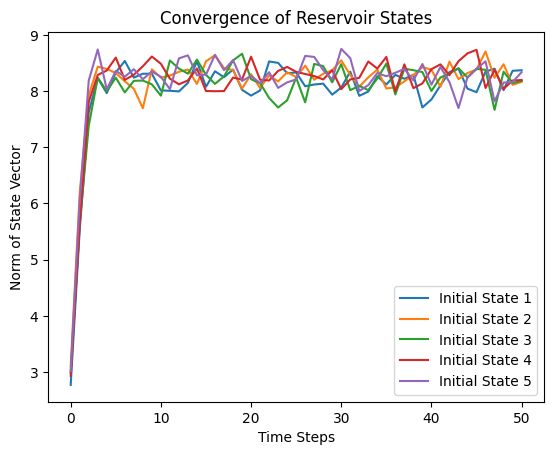

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming a simple reservoir setup
def reservoir_update(W, Win, res_state, input_signal):
    return np.tanh(np.dot(W, res_state) + np.dot(Win, input_signal))

# Example parameters
num_units = 100
W = np.random.rand(num_units, num_units) - 0.5
Win = np.random.rand(num_units, 1) - 0.5
input_signal = np.random.rand(1) - 0.5
time_steps = 50

# Initial states
initial_states = [np.random.rand(num_units) - 0.5 for _ in range(5)]
reservoir_states = [initial_states.copy()]

for t in range(time_steps):
    next_states = []
    for state in reservoir_states[-1]:
        next_state = reservoir_update(W, Win, state, input_signal)
        next_states.append(next_state)
    reservoir_states.append(next_states)

# Plotting convergence of states
for i, state_trajectory in enumerate(zip(*reservoir_states)):
    plt.plot([np.linalg.norm(state) for state in state_trajectory], label=f'Initial State {i+1}')
plt.xlabel('Time Steps')
plt.ylabel('Norm of State Vector')
plt.legend()
plt.title('Convergence of Reservoir States')
plt.show()

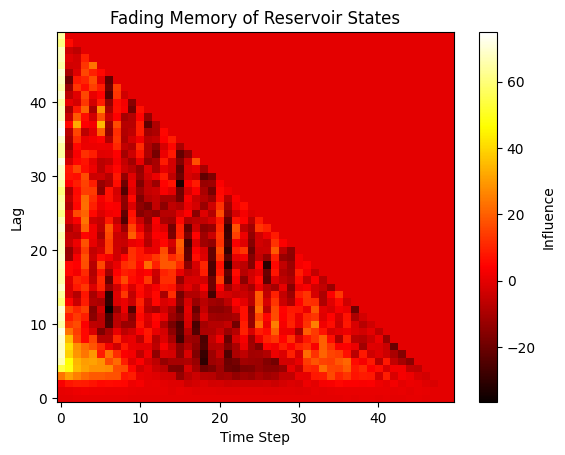

In [2]:
# Generating a structured input sequence
input_sequence = np.sin(np.linspace(0, 10, time_steps)) + np.random.normal(0, 0.1, time_steps)
res_state = np.zeros(num_units)
reservoir_states = []

for t in range(time_steps):
    input_signal = np.array([input_sequence[t]])
    res_state = reservoir_update(W, Win, res_state, input_signal)
    reservoir_states.append(res_state)

# Plotting the influence of past inputs
influence_matrix = np.zeros((time_steps, time_steps))
for t in range(time_steps):
    for tau in range(time_steps - t):
        influence_matrix[t, tau] = np.dot(reservoir_states[t], reservoir_states[t + tau])

plt.imshow(influence_matrix, aspect='auto', cmap='hot', origin='lower')
plt.colorbar(label='Influence')
plt.xlabel('Time Step')
plt.ylabel('Lag')
plt.title('Fading Memory of Reservoir States')
plt.show()